<a href="https://colab.research.google.com/github/DanOliveira-DS/data_science/blob/master/Queimadas_Brasileiras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img width='60%' src="https://upload.wikimedia.org/wikipedia/commons/6/63/Amazon_fire_satellite_image.png"></center>

**Contexto**
A floresta amazônica é a maior floresta tropical do mundo. Os incêndios florestais são um problema sério para a preservação das florestas tropicais. Compreender a frequência dos incêndios florestais em uma série temporal pode ajudar a tomar medidas para evitá-los. O Brasil possui a maior floresta tropical do planeta que é a floresta amazônica.

**Conteúdo**

Este relatório de conjunto de dados do número de incêndios florestais no Brasil dividido por estados. A série compreende o período de aproximadamente 20 anos (1998 a 2017). Os dados foram obtidos no site oficial do governo brasileiro.
http://dados.gov.br/dataset/sistema-nacional-de-informacoes-florestais-snif

**Inspiração**

Com esses dados, é possível avaliar a evolução dos incêndios ao longo dos anos, bem como as regiões onde eles estavam concentrados. A Amazônia legal compreende os estados do Acre, Amapá, Pará, Amazonas, Rondônia, Roraima e parte de Mato Grosso, Tocantins e Maranhão.


# Importando bibliotecas


In [0]:
# importando bibliotecas
import pandas as pd
import numpy as np

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Coletando Dados
O arquivo csv que contém os dados que vamos usar foi hospedado no meu repositório do GitHub. Você pode acessa-los clicando neste [link](https://raw.githubusercontent.com/DanOliveira-DS/data_science/master/dataset/amazon.csv).

In [0]:
# atribuindo a base de dados a variavel amazon_df
amazon_df = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/data_science/master/dataset/amazon.csv",
                        encoding="Latin1")

Foi preciso passar o parâmetro encoding="Latin1" pois temos um UnicodeDecodeError. Esse erro acontece porque temos uma sequência ilegal de caracteres como mostrado na img  ![UnicodeDecodeError](https://drive.google.com/uc?id=17oPsXhwqTbHLdForNZ_frBW1NgyPLBUH)


**obs.: usei Latin1, mas temos outras opções no [link](https://docs.python.org/3/library/codecs.html#standard-encodings)** 

# Análise Exploratória

Dicionario das variaveis

* `year` - ano do levantamento
* `state` - estado brasileiro
* `month` -  mês de refência
* `number` -  numero de queimadas reportadas
* `date` - dia/mes/ano 

Antes de iniciar qualquer analise. Vamos verificar nosso dataset apresentando a 5 primeiro entradas

In [0]:
# mostrar a 5 primeiro entradas
amazon_df.head()


,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?

In [0]:
# atributos
print(f"Variaveis: {amazon_df.shape[0]}")
print(f"Entradas: {amazon_df.shape[1]}\n")

#tipos das variaveis
print(amazon_df.dtypes)

Variaveis: 6454
Entradas: 5

year        int64
state      object
month      object
number    float64
date       object
dtype: object


## Q1. Qual a porcentagem de valores ausentes no dataset?
Um passo importante na análise de dados é verificação de dados ausentes, isso porque a qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. 

É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.
Baseado com a leitura do número de atributos e usando a função info. 

Foi possível verificar que nosso dataset não possui dados faltantes. Uma outra forma de verificar seria usando a função `.isnull()`


In [0]:
# verificando dados ausentes
print("Informacoes:\n")
amazon_df.info()
print("\n--------------------------\n")
# usando isnull()
amazon_df.isnull().sum()

Informacoes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB

--------------------------



year      0
state     0
month     0
number    0
date      0
dtype: int64

## Q2. Verificando valores unicos
Para ver quais são todos os valores únicos de uma coluna, é conveniente usar o método unique().

In [0]:
# Valores unicos para estados
amazon_df.state.unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [0]:
# Valores unicos para meses
amazon_df.month.unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [0]:
# Valores unicos para anos
amazon_df.year.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

## Q3. Resumo das informações estatísticas

Uma das maneiras mais simples de se iniciar uma análise exploratória das variáveis numéricas é utilizando o método `describe()`.

Imediatamente você obtém um resumo contendo algumas das principais informações estatísticas relevantes:

* **count** - quantidade de entradas válidas
* **mean** - média dos valores
* **std** - desvio padrão
* **min** - menor valor da coluna
* **25%** - percentil 25
* **50%** - percentil 50 (e mediana)
* **75%** - percentil 75
* **max** - maior valor da coluna

É possível identificar de cara colunas com valores ausentes e possíveis *outliers* (por exemplo, olhando o valor da mediana e comparando com valores máximos e mínimos)



In [0]:
# verificando dados estatisticos de resumo
amazon_df.number.describe()

count    6454.000000
mean      108.293163
std       190.812242
min         0.000000
25%         3.000000
50%        24.000000
75%       113.000000
max       998.000000
Name: number, dtype: float64

In [0]:
# Numero total de queimadas reportadas em 19 anos
print(f"Número total de queimadas em 19 anos foi de: {amazon_df.number.sum()}")

Número total de queimadas em 19 anos foi de: 698924.073


## Q4. Qual o tipo de distribuição das variáveis?
Para identificar essa distribuição, uma boa ideia é plotar um histograma

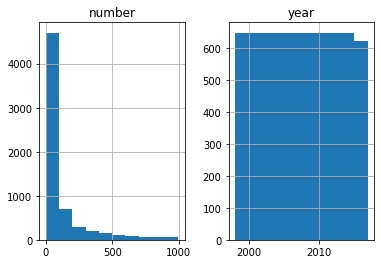

In [0]:
amazon_df.hist();

## Q5. Removendo coluna `date`

Como `year` e `date` representam a mesma informação. Podemos remover a coluna `date` por não agregar nada a nossa análise

In [0]:
# removendo coluna `date`
amazon_df.drop(columns='date', axis=1, inplace=True)

In [0]:
# verificando o novo dateset
amazon_df.head()

,year,state,month,number
0,1998,Acre,Janeiro,0.0
1,1999,Acre,Janeiro,0.0
2,2000,Acre,Janeiro,0.0
3,2001,Acre,Janeiro,0.0
4,2002,Acre,Janeiro,0.0


Por questões estéticas vou alterar o nome a ordem das nossas colunas


In [0]:
# renomeando colunas
amazon_df.rename(columns={'state':'State','number':'Fire_Number','month':'Month',
                          'year':'Year'}, inplace=True)

# alterando ordem
amazon_df = amazon_df[['State',
                       'Fire_Number',
                       'Month',
                       'Year']]

In [0]:
# verifcando novo formato
amazon_df.head()

,State,Fire_Number,Month,Year
0,Acre,0.0,Janeiro,1998
1,Acre,0.0,Janeiro,1999
2,Acre,0.0,Janeiro,2000
3,Acre,0.0,Janeiro,2001
4,Acre,0.0,Janeiro,2002


# Visualização dos Dados

A visualização de dados é a apresentação de informações quantitativas em uma forma gráfica. Em outras palavras, as visualizações de dados transformam grandes e pequenos conjuntos de dados em visuais que são mais fáceis para o cérebro humano entender e processar.

## Quantidade de queimadas reportadas por estado no espaço amostral de 19 anos

In [0]:
# criando a variavel de armazenamento
sum_fire_states = amazon_df.groupby(['State']).Fire_Number.sum()

In [0]:
# Numero total de queimadas reportadas por estado
print("VALORES TOTAIS DE QUEIMADAS POR ESTADO:")
sum_fire_states.sort_values(ascending=False)


VALORES TOTAIS DE QUEIMADAS POR ESTADO:


State
Mato Grosso         96246.028
Paraiba             52435.918
Sao Paulo           51121.198
Rio                 45160.865
Bahia               44746.226
Piau                37803.747
Goias               37695.520
Minas Gerais        37475.258
Tocantins           33707.885
Amazonas            30650.129
Ceara               30428.063
Maranhao            25129.131
Pará                24512.144
Pernambuco          24498.000
Roraima             24385.074
Santa Catarina      24359.852
Amapa               21831.576
Rondonia            20285.429
Acre                18464.030
Espirito Santo       6546.000
Alagoas              4644.000
Distrito Federal     3561.000
Sergipe              3237.000
Name: Fire_Number, dtype: float64

In [0]:
# mostrar a porcentagem de queimadas
print("VALORES EM PORCENTAGEM: % ")
(sum_fire_states.sort_values(ascending=False) / amazon_df.Fire_Number.sum())*100

VALORES EM PORCENTAGEM: % 


State
Mato Grosso         13.770599
Paraiba              7.502377
Sao Paulo            7.314271
Rio                  6.461484
Bahia                6.402158
Piau                 5.408849
Goias                5.393364
Minas Gerais         5.361850
Tocantins            4.822825
Amazonas             4.385330
Ceara                4.353558
Maranhao             3.595402
Pará                 3.507125
Pernambuco           3.505102
Roraima              3.488945
Santa Catarina       3.485336
Amapa                3.123598
Rondonia             2.902379
Acre                 2.641779
Espirito Santo       0.936582
Alagoas              0.664450
Distrito Federal     0.509497
Sergipe              0.463140
Name: Fire_Number, dtype: float64

ESTADOS X NUMERO DE QUEIMADAS:



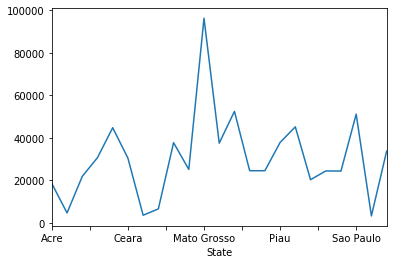

In [0]:
# plotando grafico de linhas
print("ESTADOS X NUMERO DE QUEIMADAS:\n")
sum_fire_states.plot();


ESTADOS X NUMERO DE QUEIMADAS:



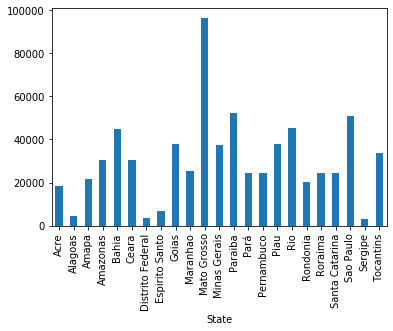

In [0]:
# plotando grafico de barras
print("ESTADOS X NUMERO DE QUEIMADAS:\n")
sum_fire_states.plot(kind='bar');

### Qual estado apresentou o maior numero de queimadas reportadas?

Com nossa análise foi possivel verificar que o estado que apresentou o maior numero de queimadas foi Mato Grosso com 96246.028 representando assim 13,7 % do total de queimadas

## Quantidade de queimadas reportadas pelos meses

In [0]:
# criando a variavel de armazenamento
sum_fire_month = (amazon_df.groupby(['Month'], sort=False).Fire_Number.sum())

# imprimindo variavel
print("NUMERO TOTAL DE QUEIMADAS PELOS MESES:")
print(sum_fire_month)

NUMERO TOTAL DE QUEIMADAS PELOS MESES:
Month
Janeiro      47747.844
Fevereiro    30848.050
Março        30717.405
Abril        28188.770
Maio         34731.363
Junho        56010.675
Julho        92326.113
Agosto       88050.435
Setembro     58578.305
Outubro      88681.579
Novembro     85508.054
Dezembro     57535.480
Name: Fire_Number, dtype: float64


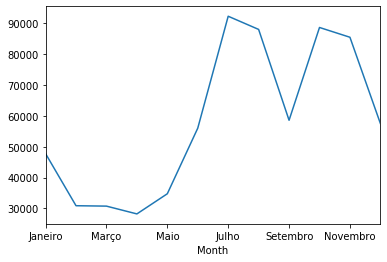

In [0]:
# plotando grafico
sum_fire_month.plot();

### Quais meses apresentaram o maior numero de queimadas reportadas?

Os meses de Julho e Outubro sao os grandes campeões. Um ponto interesante de se analisar é que estes sao meses que apresentam temperaturas elevadas.


## Quantidade de queimadas reportadas por ano 

In [0]:
# criando a variavel de armazenamento
sum_fire_year = (amazon_df.groupby(['Year']).Fire_Number.sum())

# imprimindo variavel
print("NUMERO TOTAL DE QUEIMADAS POR ANO:")
print(sum_fire_year.sort_values(ascending=False))

NUMERO TOTAL DE QUEIMADAS POR ANO:
Year
2003    42760.674
2016    42212.229
2015    41208.292
2012    40084.860
2014    39621.183
2009    39117.178
2004    38453.163
2002    37390.600
2010    37037.449
2017    36685.624
2013    35146.118
2005    35004.965
2011    34633.545
2006    33832.161
2007    33037.413
2008    29378.964
2001    29071.612
2000    27351.251
1999    26882.821
1998    20013.971
Name: Fire_Number, dtype: float64


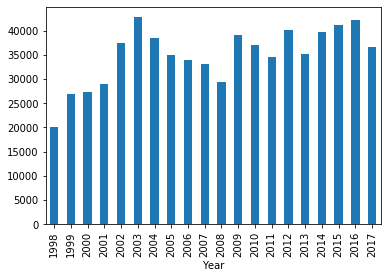

In [0]:
amazon_df.groupby(['Year']).Fire_Number.sum().plot(kind='bar');

### Qual ano apresentou o maior numero de queimadas reportadas?



In [0]:
print(f"Ano 2003 foi o grande 'campeão' com um total de: {round(sum_fire_year[2003],0)} queimadas reportadas")

Ano 2003 foi o grande 'campeão' com um total de: 42761.0 queimadas reportadas


# Conclusão

Conclusão
Diante do exposto, percebe-se que há uma tendência positiva nos relatórios de incêndio nesses 20 anos - o que apenas levanta a bandeira da atenção para preservação das florestas tropicais-.

Nota-se que o estado o Mato Grosso é aquele com a condição mais extrema da observação. Entretanto, o restante dos estados não fica muito atrás, como visto nos gráficos, pois não há declínio. Além disso, analisamos as distribuições estatísticas entre os meses mais quentes do Brasil e conseguimos identificar aqueles com as maiores medianas. O que pode ser útil para criar planos de combate, antecedendo possíveis surtos.

No geral, esse conjunto de dados pode, definitivamente, ter mais recursos, para que mais informações possam ser analisadas e correlações identificadas - o que resultaria em previsões poderosas aplicando algoritmos de aprendizado de máquina (Machine Learning)-.

Se você gostou deste post ou deseja iniciar uma discussão, deixe um comentário!